In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
def get_ref():
    """returns a DataFrame containing all the reference structure values"""
    ref_df = pd.read_csv("../RAW_DATA/reference-pi_score.csv", index_col = 0)
    return ref_df



def make_water_df_list(run):
    
    df_3J95 = pd.read_csv(("../RAW_DATA/{}/3J95_pi_score.csv").format(run), index_col = "structure")
    df_3J96 = pd.read_csv(("../RAW_DATA/{}/3J96_pi_score.csv").format(run), index_col = "structure")
    df_5GRS = pd.read_csv(("../RAW_DATA/{}/5GRS_pi_score.csv").format(run), index_col = "structure")
    df_5HNY = pd.read_csv(("../RAW_DATA/{}/5HNY_pi_score.csv").format(run), index_col = "structure")
    df_5WCB = pd.read_csv(("../RAW_DATA/{}/5WCB_pi_score.csv").format(run), index_col = "structure")
#     df_6ACG = pd.read_csv(("../RAW_DATA/{}/6ACG_pi_score.csv").format(run), index_col = "structure") Unable to analyse using pi-score
    df_6AHF = pd.read_csv(("../RAW_DATA/{}/6AHF_pi_score.csv").format(run), index_col = "structure")
    df_6IRF = pd.read_csv(("../RAW_DATA/{}/6IRF_pi_score.csv").format(run), index_col = "structure")
    df_6N1Q = pd.read_csv(("../RAW_DATA/{}/6N1Q_pi_score.csv").format(run), index_col = "structure")
    df_6N7G = pd.read_csv(("../RAW_DATA/{}/6N7G_pi_score.csv").format(run), index_col = "structure")
    df_6N8Z = pd.read_csv(("../RAW_DATA/{}/6N8Z_pi_score.csv").format(run), index_col = "structure")
    df_6R7I = pd.read_csv(("../RAW_DATA/{}/6R7I_pi_score.csv").format(run), index_col = "structure")
    df_6UBY = pd.read_csv(("../RAW_DATA/{}/6UBY_pi_score.csv").format(run), index_col = "structure")
    df_6UC0 = pd.read_csv(("../RAW_DATA/{}/6UC0_pi_score.csv").format(run), index_col = "structure")
    
    df_list = [
        df_3J95,
        df_3J96,
        df_5GRS,
        df_5HNY,
        df_5WCB,
#         df_6ACG,
        df_6AHF,
        df_6IRF,
        df_6N1Q,
        df_6N7G,
        df_6N8Z,
        df_6R7I,
        df_6UBY,
        df_6UC0,
    ]
    
    return df_list

In [3]:
runs =[
    "SA", "SA_CA", 
    "SA_SR","SA_CM", "SA_CTRD", "MD",   
    "CG", "CG_MD"
]   


In [4]:
score_df = pd.DataFrame()
ref_df = get_ref()
for run in runs:
    df_list = make_water_df_list(run)
    data_frame = pd.DataFrame()
    for df in iter(df_list):
        structure = df.index[0][:4]
        df = df.sub(ref_df.loc[structure,"pi_score"])
        data_frame = pd.concat([data_frame, df], ignore_index=True, axis = 0)
    score_df = pd.concat([score_df, data_frame], axis=1, ignore_index=True)

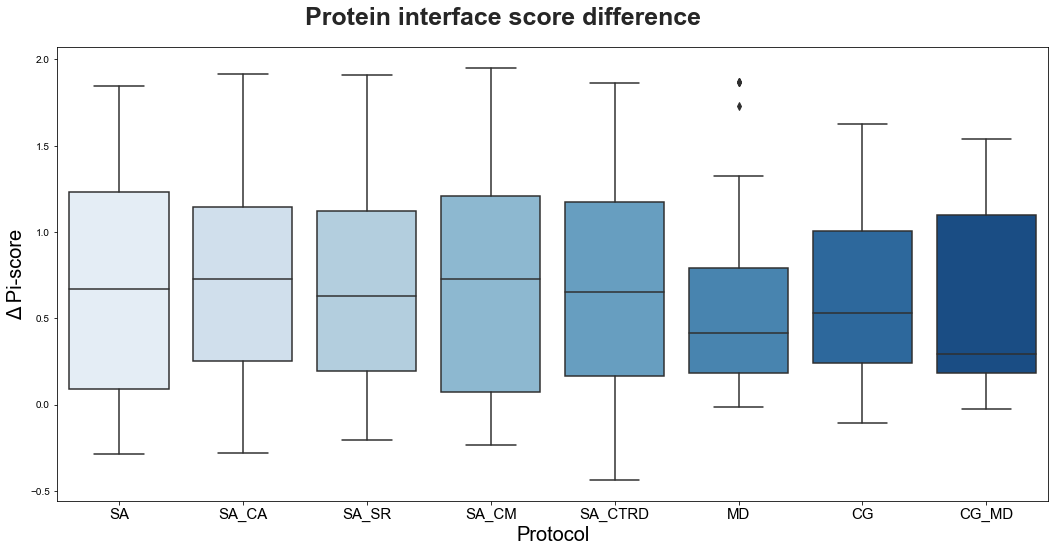

In [5]:
fig, ax = plt.subplots(nrows=1, figsize=(15,8))
                       
sns.set(font_scale=1.5, style="whitegrid")
plot = sns.boxplot(data=score_df, palette="Blues")
plot.set_xticklabels(runs, fontsize=15)
plot.set_ylabel("Δ Pi-score", fontsize=20)
plot.set_xlabel("Protocol", fontsize=20)
plot.text(1.5,2.2,"Protein interface score difference", fontsize=25, weight="semibold")

plt.tight_layout()

In [6]:
score_df.describe()

,0,1,2,3,4,5,6,7
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.680923,0.720406,0.674172,0.707578,0.676031,0.588559,0.685617,0.587703
std,0.621616,0.584440,0.578689,0.654351,0.614223,0.532884,0.554560,0.555750
min,-0.287500,-0.282000,-0.206000,-0.234000,-0.437500,-0.012500,-0.107500,-0.026250
25%,0.090625,0.255000,0.195000,0.073750,0.162375,0.180000,0.243330,0.182500
50%,0.669250,0.728595,0.631040,0.726875,0.649000,0.414440,0.532000,0.292500
75%,1.228438,1.141875,1.119060,1.205832,1.172280,0.791747,1.005000,1.100000
max,1.845830,1.913500,1.908750,1.951500,1.860360,1.869500,1.624500,1.540000


In [7]:
ref_df

,pi_score
structure,
3J95,0.99400
3J96,1.14889
5GRS,1.30250
5HNY,-0.30000
5WCB,0.68000
6AHF,0.52800
6IRF,1.13500
6N1Q,0.17625
6N7G,0.00000


In [9]:
score_df = pd.DataFrame()
for run in runs:
    df_list = make_water_df_list(run)
    data_frame = pd.DataFrame()
    for df in iter(df_list):
        data_frame = pd.concat([data_frame, df], ignore_index=True, axis = 0)
    score_df = pd.concat([score_df, data_frame], axis=1, ignore_index=True)
    
score_df.describe()

,0,1,2,3,4,5,6,7
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.237447,1.276930,1.230696,1.264102,1.232554,1.145083,1.242141,1.144227
std,0.503882,0.411275,0.394685,0.462336,0.465074,0.544537,0.485475,0.413239
min,0.392500,0.398000,0.474000,0.426000,0.242500,-0.007500,0.536250,0.150000
25%,0.875000,0.970500,0.981500,0.910000,0.952500,0.793125,1.004000,0.946000
50%,1.273000,1.295415,1.264165,1.227500,1.248750,1.233250,1.292500,1.234000
75%,1.413640,1.429860,1.407293,1.419912,1.403998,1.563330,1.412500,1.485000
max,2.760000,2.250000,2.208330,2.473330,2.200000,2.253330,2.356670,1.775000
